<br><br>
<font size='6'><b>K-Nearest Neighbor (KNN)</b></font><br><br>

<br>
<div class=pull-right>
By Prof. Seungchul Lee<br>
http://iai.postech.ac.kr/<br>
Industrial AI Lab at POSTECH
</div>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Supervised-Learning" data-toc-modified-id="1.-Supervised-Learning-1">1. Supervised Learning</a></span></li><li><span><a href="#2.-K-Nearest-Neighbor-(KNN)-Regression" data-toc-modified-id="2.-K-Nearest-Neighbor-(KNN)-Regression-2">2. K-Nearest Neighbor (KNN) Regression</a></span></li><li><span><a href="#3.-K-Nearest-Neighbor-(KNN)-Classification" data-toc-modified-id="3.-K-Nearest-Neighbor-(KNN)-Classification-3">3. K-Nearest Neighbor (KNN) Classification</a></span></li></ul></div>

# 1. Supervised Learning


- Given training set $\left\{ \left(x^{(1)}, y^{(1)}\right), \left(x^{(2)}, y^{(2)}\right),\cdots,\left(x^{(m)}, y^{(m)}\right) \right\}$


- Want to find a function $f_{\omega}$ with <font color = 'red'>learning parameter</font>, $\omega$
    - $f_{\omega}$ desired to be as close as possible to $y$ for future $(x,y)$
    - $i.e., f_{\omega}(x) \approx y$


- Define a loss function 

$$\ell \left(f_{\omega} \left(x^{(i)}\right), y^{(i)}\right)$$


- Solve the following optimization problem:

$$ 
\begin{align*}
\text{minimize} &\quad \frac{1}{m} \sum_{i=1}^{m} \ell \left(f_{\omega} \left(x^{(i)}\right), y^{(i)}\right)\\
\text{subject to} &\quad \omega \in \boldsymbol{\omega}
\end{align*}
$$
<br>

- Function approximation between inputs and outputs

<br>
<center><img src='./image_files/func_approx.png' width = 250></center>

- Once it is learned,


<center><img src='./image_files/once_learned.png' width = 400></center>

# 2. K-Nearest Neighbor (KNN) Regression

- Non-parametric method


We write our model as

$$y = f(x) + \varepsilon$$

where $\varepsilon$ captures measurement errors and other discrepancies.


Then, with a good  $f$  we can make predictions of  $y$  at new points  $x_{\text{new}}$ . One possible way so called "nearest neighbor method" is:

<br>
$$\hat y = \text{avg} \left(y \mid x \in \mathcal{N}(x_{\text{new}}) \right)$$

where $\mathcal{N}(x)$ is some neighborhood of $x$

<br>
<img src='./image_files/neighborhood_estimate.png' width = 500>

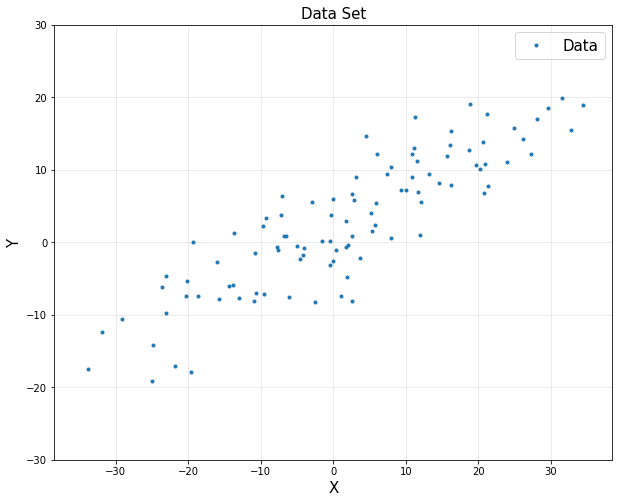

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

N = 100
w1 = 0.5
w0 = 2
x = np.random.normal(0, 15, N).reshape(-1,1)
y = w1*x + w0 + 5*np.random.normal(0, 1, N).reshape(-1,1)

plt.figure(figsize = (10, 8))
plt.title('Data Set', fontsize = 15)
plt.plot(x, y, '.', label = 'Data')
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 15)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

In [2]:
from sklearn import neighbors

reg = neighbors.KNeighborsRegressor(n_neighbors = 1)
reg.fit(x, y)

KNeighborsRegressor(n_neighbors=1)

In [4]:
x_new = np.array([[5]])
pred = reg.predict(x_new)[0,0] 
print(pred)

4.064872249305311


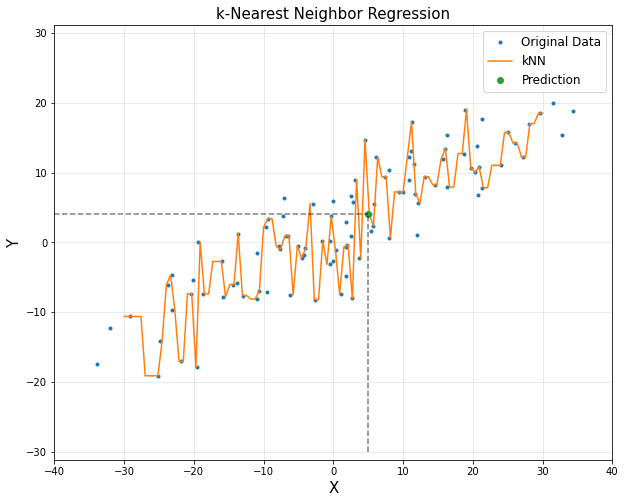

In [5]:
xp = np.linspace(-30, 30, 100).reshape(-1, 1)
yp = reg.predict(xp)

plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize = 15)
plt.plot(x, y, '.', label = 'Original Data')
plt.plot(xp, yp, label = 'kNN')
plt.plot(x_new, pred, 'o', label = 'Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-30, pred], 'k--', alpha = 0.5)
plt.plot([-40, x_new[0,0]], [pred, pred], 'k--', alpha = 0.5)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

In [6]:
# n_neighbors=21

reg2 = neighbors.KNeighborsRegressor(n_neighbors = 21)
reg2.fit(x, y)

KNeighborsRegressor(n_neighbors=21)

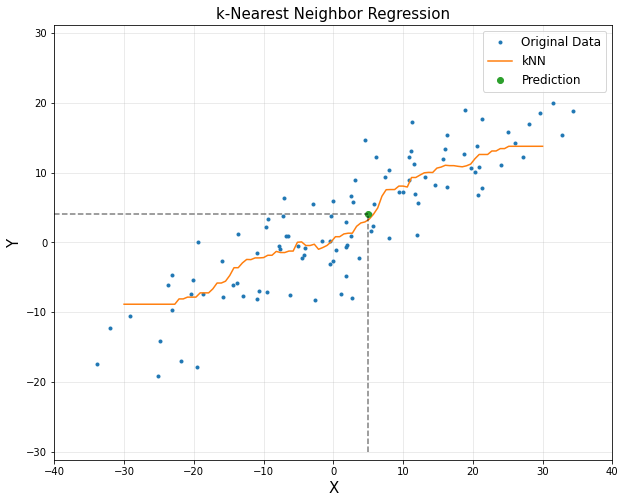

In [7]:
# plot n_neighbors=21

xp = np.linspace(-30, 30, 100).reshape(-1, 1)
yp = reg2.predict(xp)

plt.figure(figsize = (10, 8))
plt.title('k-Nearest Neighbor Regression', fontsize = 15)
plt.plot(x, y, '.', label = 'Original Data')
plt.plot(xp, yp, label = 'kNN')
plt.plot(x_new, pred, 'o', label = 'Prediction')
plt.plot([x_new[0,0], x_new[0,0]], [-30, pred], 'k--', alpha = 0.5)
plt.plot([-40, x_new[0,0]], [pred, pred], 'k--', alpha = 0.5)
plt.xlabel('X', fontsize = 15)
plt.ylabel('Y', fontsize = 15)
plt.legend(fontsize = 12)
plt.axis('equal')
plt.axis([-40, 40, -30, 30])
plt.grid(alpha = 0.3)
plt.show()

# 3. K-Nearest Neighbor (KNN) Classification

- Non-parametric method


- In k-NN classification, an object is assigned to the class most common among its $k$ nearest neighbors ($k$ is a positive integer, typically small).
- If $k = 1$, then the object is simply assigned to the class of that single nearest neighbor.

<img src = "./image_files/KNN 1_100.png" width=50%>

- Zoom in,

<img src = "./image_files/knn_img.png" width=30%>

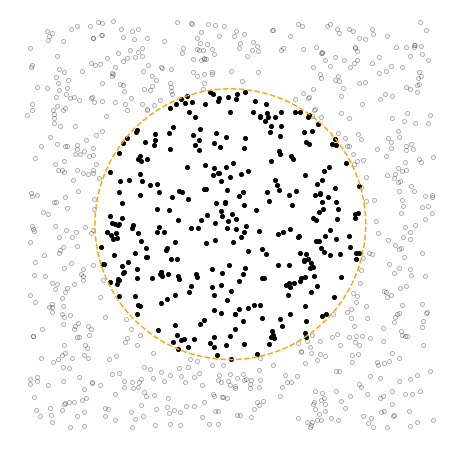

In [10]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1:
        y[i] = 1

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()

In [7]:
from sklearn import neighbors

clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, np.ravel(y))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
X_new = np.array([1, 1]).reshape(1,-1)
result = clf.predict(X_new)[0]
print(result)

0.0


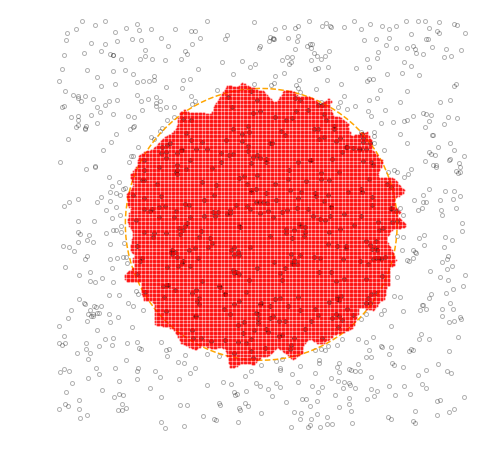

In [9]:
res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

When outliers exist

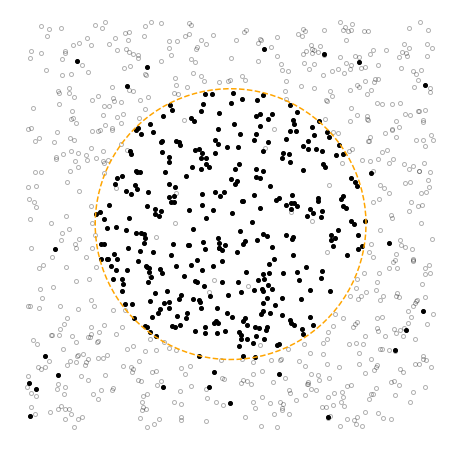

In [8]:
m = 1000
X = -1.5 + 3*np.random.uniform(size = (m,2))

y = np.zeros([m,1])
for i in range(m):
    if np.linalg.norm(X[i,:], 2) <= 1:
        if np.random.uniform() < 0.05:
            y[i] = 0
        else:
            y[i] = 1    
    else:
        if np.random.uniform() < 0.05:
            y[i] = 1
        else:
            y[i] = 0

C1 = np.where(y == 1)[0]
C0 = np.where(y == 0)[0]

theta = np.linspace(0, 2*np.pi, 100)

plt.figure(figsize = (8,8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor = 'k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()

$k = 1$

In [9]:
# n_neighbors=1, kNN classifier
clf = neighbors.KNeighborsClassifier(n_neighbors = 1)
clf.fit(X, np.ravel(y))

KNeighborsClassifier(n_neighbors=1)

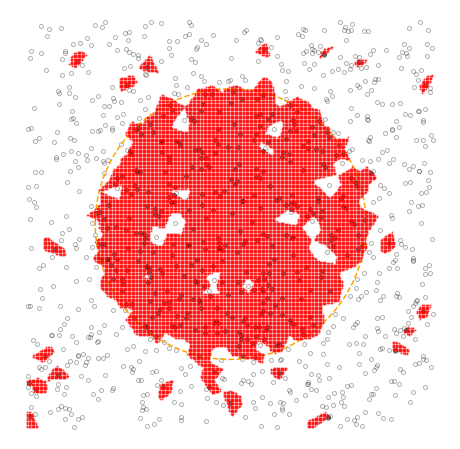

In [10]:
# Plot
res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   

$k = 11$

In [11]:
# n_neighbors=11, kNN classifier
clf2 = neighbors.KNeighborsClassifier(n_neighbors = 11)
clf2.fit(X, np.ravel(y))

KNeighborsClassifier(n_neighbors=11)

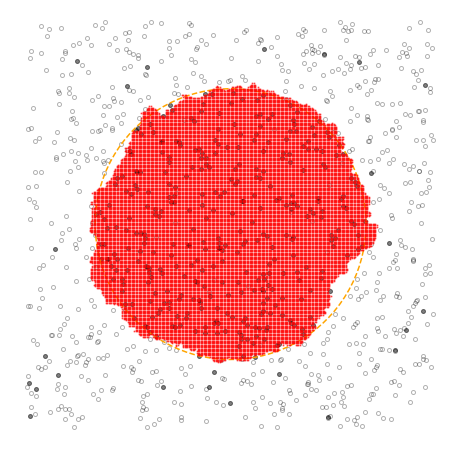

In [13]:
# Plot
res = 0.01
[X1gr, X2gr] = np.meshgrid(np.arange(-1.5,1.5,res), np.arange(-1.5,1.5,res))

Xp = np.hstack([X1gr.reshape(-1,1), X2gr.reshape(-1,1)])
Xp = np.asmatrix(Xp)

inC1 = clf2.predict(Xp).reshape(-1,1)
inCircle = np.where(inC1 == 1)[0]

plt.figure(figsize = (8, 8))
plt.plot(X[C1,0], X[C1,1], 'o', label = 'C1', markerfacecolor = "k", alpha = 0.5, markeredgecolor = 'k', markersize = 4)
plt.plot(X[C0,0], X[C0,1], 'o', label = 'C0', markerfacecolor = "None", alpha = 0.3, markeredgecolor='k', markersize = 4)
plt.plot(np.cos(theta), np.sin(theta), '--', color = 'orange')
plt.plot(Xp[inCircle][:,0], Xp[inCircle][:,1], 's', alpha = 0.5, color = 'r', markersize = 1)
plt.axis([-1.5, 1.5, -1.5, 1.5])
plt.axis('equal')
plt.axis('off')
plt.show()   